In [247]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
os.chdir('C:\\Users\\Vidhya\\Documents\\Python\\Desktop\\Edubridge\\Python\\Datasets')

In [249]:
insurance=pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## EDA

In [250]:
insurance.shape

(1338, 7)

In [251]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [252]:
insurance.info()

#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [253]:
insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


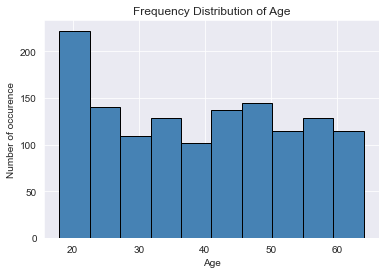

In [254]:
plt.hist(insurance['age'],bins=10,color='steelblue',edgecolor='black')
plt.title('Frequency Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of occurence')
plt.show()

In [255]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [256]:
gender_count=insurance['sex'].value_counts()
gender_count

male      676
female    662
Name: sex, dtype: int64

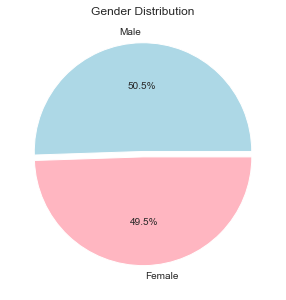

In [257]:
fig=plt.figure(figsize=(5,5))
plt.pie(gender_count,labels=['Male','Female'],autopct='%0.1f%%',colors=['lightblue','lightpink'],explode=[0.05,0])
plt.title('Gender Distribution')
plt.show()

In [258]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [259]:
division=insurance['region'].value_counts()
division

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

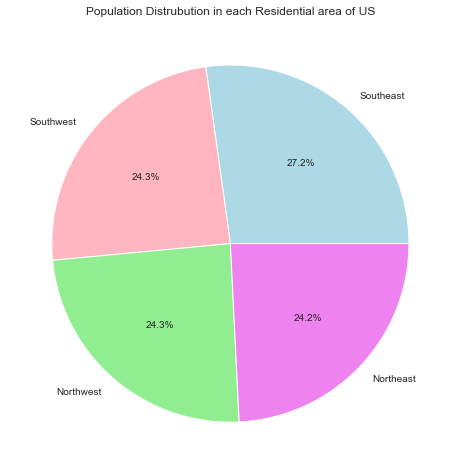

In [260]:
fig=plt.figure(figsize=(8,18))
plt.pie(division,labels=['Southeast','Southwest','Northwest','Northeast'],autopct='%0.1f%%',colors=['lightblue','lightpink','lightgreen','violet'])
plt.title('Population Distrubution in each Residential area of US')
plt.show()

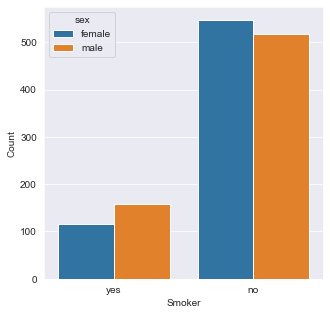

In [261]:
fig=plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
sns.countplot(x='smoker',hue='sex',data=insurance)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

In [262]:
insurance.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [263]:
#calculating average charges by each region
north_east=np.mean(insurance['charges'][insurance['region']=='northeast'])
print(north_east)
print('================================================')
north_west=np.mean(insurance['charges'][insurance['region']=='northwest'])
print(north_west)
print('================================================')
south_east=np.mean(insurance['charges'][insurance['region']=='southeast'])
print(south_east)
print('================================================')
south_west=np.mean(insurance['charges'][insurance['region']=='southwest'])
print(south_west)

13406.3845163858
12417.575373969228
14735.411437609895
12346.93737729231


In [264]:
division=[south_east,north_east,north_west,south_west]
division

[14735.411437609895, 13406.3845163858, 12417.575373969228, 12346.93737729231]

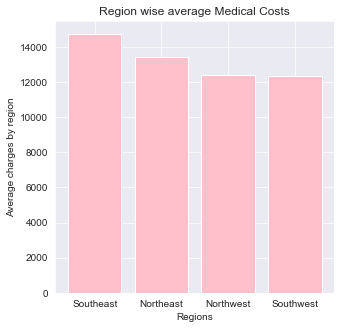

In [265]:
fig=plt.figure(figsize=(5,5))
plt.bar(['Southeast','Northeast','Northwest','Southwest'],division,color='pink')
plt.xlabel('Regions')
plt.ylabel('Average charges by region')
plt.title('Region wise average Medical Costs')
plt.show()

In [266]:
cost_male=np.mean(insurance['charges'][insurance['sex']=='male'])
print(cost_male)
print('========================================================')

cost_female=np.mean(insurance['charges'][insurance['sex']=='female'])
print(cost_female)

13956.751177721886
12569.57884383534


In [267]:
cost=[cost_male,cost_female]
cost

[13956.751177721886, 12569.57884383534]

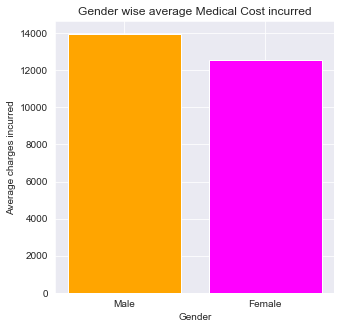

In [268]:
fig=plt.figure(figsize=(5,5))
plt.bar(['Male','Female'],cost,color=['orange','magenta'])
plt.xlabel('Gender')
plt.ylabel('Average charges incurred')
plt.title('Gender wise average Medical Cost incurred')
plt.show()

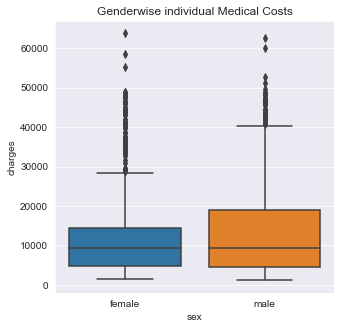

In [269]:
fig=plt.figure(figsize=(5,5))
sns.boxplot(x='sex',y='charges',data=insurance)
plt.title('Genderwise individual Medical Costs')
plt.show()

In [270]:
kid_0=np.mean(insurance['charges'][insurance['children']==0])
print(kid_0)
print('====================================================')

kid_1=np.mean(insurance['charges'][insurance['children']==1])
print(kid_1)
print('====================================================')

kid_2=np.mean(insurance['charges'][insurance['children']==2])
print(kid_2)
print('====================================================')

kid_3=np.mean(insurance['charges'][insurance['children']==3])
print(kid_3)
print('====================================================')

kid_4=np.mean(insurance['charges'][insurance['children']==4])
print(kid_4)
print('====================================================')

kid_5=np.mean(insurance['charges'][insurance['children']==5])
print(kid_5)

12365.975601635882
12731.171831635793
15073.563733958328
15355.31836681528
13850.656311199999
8786.035247222222


In [271]:
kids=[kid_0,kid_1,kid_2,kid_3,kid_4,kid_5]
kids

[12365.975601635882,
 12731.171831635793,
 15073.563733958328,
 15355.31836681528,
 13850.656311199999,
 8786.035247222222]

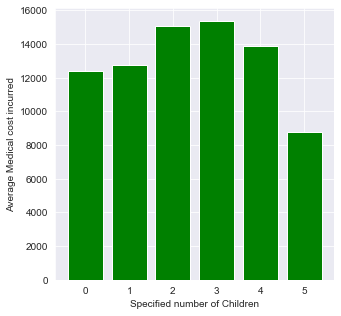

In [272]:
fig=plt.figure(figsize=(5,5))
plt.bar([0,1,2,3,4,5],kids,color='green')
plt.xlabel('Specified number of Children')
plt.ylabel('Average Medical cost incurred')
plt.title('')
plt.show()

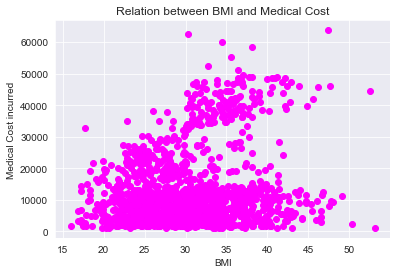

In [273]:
plt.scatter(insurance['bmi'],insurance['charges'],color='magenta')
plt.xlabel('BMI')
plt.ylabel('Medical Cost incurred')
plt.title('Relation between BMI and Medical Cost')
plt.show()